Webscraping-CSFD

In [2]:
from selenium.webdriver import Firefox, Chrome
from selenium.webdriver.chrome.service import Service as ChromeService
from selenium.webdriver.firefox.service import Service as FirefoxService

from selenium.webdriver.common.by import By
import time

from pathlib import Path

from bs4 import BeautifulSoup
import os

In [3]:
service = ChromeService()
browser = Chrome(service=service)

In [4]:
# Source URL
browser.get("https://www.csfd.cz/zebricky/filmy/nejlepsi/")

In [5]:
# Removing cookies
# ----------------------
def submit_cookies(browser):
    try:
        time.sleep(5)
        button = browser.find_element(By.ID, "didomi-notice-agree-button")
        button.click()
    except:
        pass

In [6]:
submit_cookies(browser)

In [7]:
# Creating a directory for downloading pages
# -------------------------------------

def make_directory(directory):
    path = Path(directory)
    path.mkdir(exist_ok=True)

In [8]:
make_directory("pages")

In [9]:
# # Creating one test file for downloading pages
# # -------------------------------------

# with open(r'pages\movies_01.html', 'w', encoding='utf-8') as f:
#     f.write(browser.page_source)

In [10]:
# Stažení více stránek najednou
# ------------------------------------
def save_file(filename, browser):
    with open(filename, 'w', encoding='utf-8') as f:
        f.write(browser.page_source)
        

In [11]:
# Vytvoření funkce pro konkrétní web (CSFD)
def load_movies(browser):
    url_pattern = "https://www.csfd.cz/zebricky/filmy/nejlepsi/?from={page_from}"
    file_pattern = r'pages\movies_{page_from}.html'
    pages_from = [1, 100, 200, 300, 400, 500, 600, 700, 800, 900]

    for page_from in pages_from:
        # print(url_pattern.format(page_from = page_from)) # Našlo to správné stránky? 
        # print(file_pattern.format(page_from = page_from)) # Pojmenuje je správně? 

        browser.get(url_pattern.format(page_from = page_from)) # Přidá za adresu požadované číslo ze seznamu
        save_file(file_pattern.format(page_from = page_from), browser) # Pojmenuje vytvořený soubor podle webové adresy a vzoru {page_from}


In [12]:
load_movies (browser)

In [13]:
# Projít celý adresář stažených stránek
# -------------------------------------

os.listdir ("pages") # Kontrola zda prochází opravdu to, co má

['movies_1.html',
 'movies_100.html',
 'movies_200.html',
 'movies_300.html',
 'movies_400.html',
 'movies_500.html',
 'movies_600.html',
 'movies_700.html',
 'movies_800.html',
 'movies_900.html']

In [14]:
for filename in os.listdir ("pages"):
    if filename.endswith(".html"): # Chci aby pracoval jen se soubory.html
        print (filename)   # Kontrola, zda vypíše jen soubory html

movies_1.html
movies_100.html
movies_200.html
movies_300.html
movies_400.html
movies_500.html
movies_600.html
movies_700.html
movies_800.html
movies_900.html


In [15]:
# Vytvoření funkce pro stažení konkrétních dat ze stránek
# ------------------------------------------------------------

def get_movies():
    # Vytvoření prázdného seznamu filmů
    movies = []
    
    # Načtení html kódu ze všech stažených stránek
    for filename in os.listdir ("pages"):
        if filename.endswith(".html"): 
            data = open (f"pages/{filename}", encoding ="utf-8").read()   
            html = BeautifulSoup (data, "html.parser")
    
    # Nalezení sekce, která sdružuje všechna potřebná data (zde info o filmech) a její podrobnosti
    # HTML: <section class="box">
    
            box = html.find("section", class_="box")  # Nalezení sekce
            articles = box.find_all("article")        # Nalezení kompletu jednoho filmu
            for article in articles:                  # Pro každý film:
                
                # Najdi jejich pořadí (hledám podle span a class - kombinace), odstraň tečky (replace) a prázdná místa (strip) a udělej z toho číslo (int)
                position = int(article.find("span", class_="film-title-user").text.strip().replace(".", "")) 
                
                # Najdi názvy filmů ("a" a class - kombinace), odstraň prázdná místa (strip)
                title = article.find("a", class_="film-title-name").text.strip()
    
                # Najdi rok natočení ("span" a class), odstraň prázdná místa (strip), zruš závorky (1994) - replace, převeď na číslo (int)
                year = int(article.find('span', class_='film-title-info').text.strip().replace('(', '').replace(')', ''))
    
                # Najdi výši hodnocení ("div" a class), odstraň prázdná místa (strip), převeď na desetinné číslo (float), 
                # odstraň procenta a vyměň čárky za tečky (replace)
                rating_average = float(article.find("div", class_="rating-average").text.strip().replace("%", ""). replace(",", "."))
    
                # Najdi počet hodnocení ("div" a class), odstraň prázdná místa (strip), převeď na číslo (int), 
                # Ponechání jen čísel (113 121 hodnocení hodn.) - find(string = True), odstranění mezery mezi čísly (replace('\xa0', ''))
                rating_total = int(article.find('div', class_='rating-total').find(string=True).strip().replace('\xa0', ''))

                # Najdi zemi původu a žánr ("p" a class), odstraň prázdná místa (strip)
                country_genre = article.find('p', class_='film-origins-genres').text.strip()
               
    
                
    # Přidávání do seznamu podle toho, co v něm chci mít
                movies.append({
                    "position": position,
                    "title": title,
                    "year": year,
                    "rating_average" : rating_average,
                    "rating_total": rating_total,
                    "country_genre": country_genre
                })
    
    # # Kontrola, co mám v seznamu
    #         for movie in movies:
    #             print(movie)

    return movies 

In [16]:
movies = get_movies()
# Po spuštění nebude nic vidět, ale nemělo by to vyhodit chybu. 

In [17]:
# ULOŽENÍ KOMPLET SOUBORU DO EXCELU
# ----------------------------------------------------
import pandas as pd

# Stažení dat pomocí funkce get_movies
movies = get_movies()

# Vytvoření DataFrame
df = pd.DataFrame(movies)

# Uložení DataFrame do Excelu
df.to_excel("movies.xlsx", index=False)

print("The data has been saved to a file 'movies.xlsx'.")

The data has been saved to a file 'movies.xlsx'.


In [18]:
# Vytvoření dataframu ze stažených dat 
# -----------------------------------------

import pandas as pd

In [19]:
df = pd.DataFrame(movies)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   position        1000 non-null   int64  
 1   title           1000 non-null   object 
 2   year            1000 non-null   int64  
 3   rating_average  1000 non-null   float64
 4   rating_total    1000 non-null   int64  
 5   country_genre   1000 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 47.0+ KB


In [21]:
df.head()

,position,title,year,rating_average,rating_total,country_genre
0,1,Vykoupení z věznice Shawshank,1994,95.4,113553,"USA, Drama / Krimi"
1,2,Forrest Gump,1994,94.4,128926,"USA, Drama / Komedie"
2,3,Zelená míle,1999,92.9,109756,"USA, Drama / Mysteriózní"
3,4,Sedm,1995,92.4,99319,"USA, Thriller / Krimi"
4,5,Přelet nad kukaččím hnízdem,1975,92.4,81734,"USA, Drama"


In [22]:
# ÚPRAVA SLOUPCE country_genre
# Míchají jablka a hrušky: USA / Francie, Drama / Komedie v jednom řádku kodu
# Cíl: rozdělit na 4 sloupce - country1, country2, genre1, genre2

# Rozdělení sloupce country_genre na část země a část žánru
# Pomocí str.split(',', n=1) rozdělíme country_genre na dvě části: země a žánry. n=1 zajistí, že rozdělíme po první čárce.
df[['countries', 'genres']] = df['country_genre'].str.split(',', n=1, expand=True)

# Odstranění přebytečných mezer
df['countries'] = df['countries'].str.strip()
df['genres'] = df['genres'].str.strip()

# Rozdělení zemí na jednotlivé sloupce
# Pomocí str.split('/', expand=True) rozdělíme jednotlivé země podle /.
# Přejmenujeme sloupce na country1, country2
country_split = df['countries'].str.split('/', expand=True)
country_split.columns = ['country1', 'country2']

# Rozdělení žánrů na jednotlivé sloupce - totéž jako u country
genre_split = df['genres'].str.split('/', expand=True)
genre_split.columns = ['genre1', 'genre2']

# Spojení všech sloupců do výsledného DataFrame
df = pd.concat([df, country_split, genre_split], axis=1)

# Odstranění pomocných sloupců
df = df.drop(columns=['countries', 'genres', 'country_genre'])


In [23]:
df.head()

,position,title,year,rating_average,rating_total,country1,country2,genre1,genre2
0,1,Vykoupení z věznice Shawshank,1994,95.4,113553,USA,None,Drama,Krimi
1,2,Forrest Gump,1994,94.4,128926,USA,None,Drama,Komedie
2,3,Zelená míle,1999,92.9,109756,USA,None,Drama,Mysteriózní
3,4,Sedm,1995,92.4,99319,USA,None,Thriller,Krimi
4,5,Přelet nad kukaččím hnízdem,1975,92.4,81734,USA,None,Drama,None


In [24]:
# Která země se vyskytuje nejčastěji v TOP 1000? 

# Spojení dat ze sloupců country1 a country2
all_countries = df[['country1', 'country2']].values.flatten()
# print (all_countries)

# Odstranění prázdných hodnot (None) a zbytečných mezer
all_countries = [country.strip() for country in all_countries if pd.notnull(country)]
# print (all_countries)

# # Zjištění četnosti výskytu
from collections import Counter
country_counts = Counter(all_countries)
# print (country_counts)
# ČR: Československo, Protektorát Čechy a Morava, Česko

# # Nejvyšší četnost TOP 15 filmů (půjde do PDF)
most_common_country = country_counts.most_common(15)
print (most_common_country)


[('USA', 525), ('Velká Británie', 125), ('Francie', 116), ('Československo', 100), ('Japonsko', 56), ('Itálie', 48), ('Německo', 37), ('Polsko', 22), ('Švédsko', 22), ('Západní Německo', 20), ('Španělsko', 17), ('Dánsko', 17), ('Hongkong', 16), ('Jižní Korea', 16), ('Česko', 15)]


In [25]:
# Tabulka: Země s největším výskytem v TOP 1000 filmech

import pandas as pd

# Vytvoření DataFrame z Counter
country_counts_df = pd.DataFrame(country_counts.items(), columns=['Country', 'Count'])

# Seřazení podle počtu výskytů (sestupně)
country_counts_df = country_counts_df.sort_values(by='Count', ascending=False)

# Zobrazení tabulky
print(country_counts_df)

# # Export do CSV
# country_counts_df.to_csv("country_counts.csv", index=False)

                       Country  Count
0                          USA    525
4               Velká Británie    125
1                      Francie    116
7               Československo    100
16                    Japonsko     56
5                       Itálie     48
6                      Německo     37
13                     Švédsko     22
10                      Polsko     22
17             Západní Německo     20
12                      Dánsko     17
11                   Španělsko     17
21                    Hongkong     16
24                 Jižní Korea     16
15                      Kanada     15
2                        Česko     15
31               Sovětský svaz     13
23                        Čína     10
8   Protektorát Čechy a Morava     10
25                       Irsko     10
20                   Austrálie     10
3                  Nový Zéland      9
37                      Belgie      8
26                Německá říše      8
27                   Švýcarsko      6
40          

In [26]:
# Jaký žánr je nejčastější? 

# Spojení dat ze sloupců genre1 a genre2
all_genres = df[['genre1', 'genre2']].values.flatten()
# print (all_genres)

# Odstranění prázdných hodnot (None) a zbytečných mezer
all_genres = [genre.strip() for genre in all_genres if pd.notnull(genre)]
# print (all_genres)

# # Zjištění četnosti výskytu
from collections import Counter
genres_counts = Counter(all_genres)
print (genres_counts)

Counter({'Drama': 582, 'Komedie': 212, 'Dobrodružný': 126, 'Krimi': 124, 'Akční': 123, 'Animovaný': 106, 'Romantický': 77, 'Thriller': 66, 'Válečný': 54, 'Sci-Fi': 48, 'Mysteriózní': 46, 'Životopisný': 45, 'Historický': 41, 'Rodinný': 33, 'Fantasy': 30, 'Horor': 22, 'Western': 20, 'Psychologický': 20, 'Hudební': 20, 'Sportovní': 14, 'Muzikál': 13, 'Pohádka': 10, 'Film-Noir': 8, 'Loutkový': 6, 'Road movie': 4, 'Poetický': 4, 'Experimentální': 2, 'Podobenství': 1, 'Povídkový': 1})


In [27]:
# Tabulka: Počet výskytu žánrů

# Vytvoření DataFrame z Counter
genres_counts_df = pd.DataFrame(genres_counts.items(), columns=['Genre', 'Count'])

# Seřazení podle počtu výskytů (sestupně)
genres_counts_df = genres_counts_df.sort_values(by='Count', ascending=False)

# Zobrazení tabulky
print(genres_counts_df)

# # Export do CSV, pokud chceš uložit výsledky
# country_counts_df.to_csv("country_counts.csv", index=False)

             Genre  Count
0            Drama    582
2          Komedie    212
9      Dobrodružný    126
1            Krimi    124
6            Akční    123
19       Animovaný    106
18      Romantický     77
4         Thriller     66
12         Válečný     54
7           Sci-Fi     48
3      Mysteriózní     46
14     Životopisný     45
5       Historický     41
20         Rodinný     33
8          Fantasy     30
13           Horor     22
10         Western     20
17   Psychologický     20
21         Hudební     20
16       Sportovní     14
22         Muzikál     13
15         Pohádka     10
23       Film-Noir      8
24        Loutkový      6
27        Poetický      4
11      Road movie      4
26  Experimentální      2
25     Podobenství      1
28       Povídkový      1


array([[<Axes: title={'center': 'position'}>,
        <Axes: title={'center': 'year'}>],
       [<Axes: title={'center': 'rating_average'}>,
        <Axes: title={'center': 'rating_total'}>]], dtype=object)

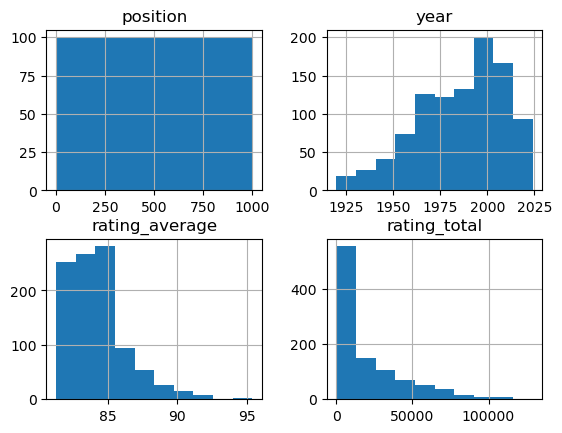

In [28]:
# Zobrazení histogramu filmů podle let
# --------------------------------

# Prvotní náhled dostupných automatických histogramů:
df.hist()

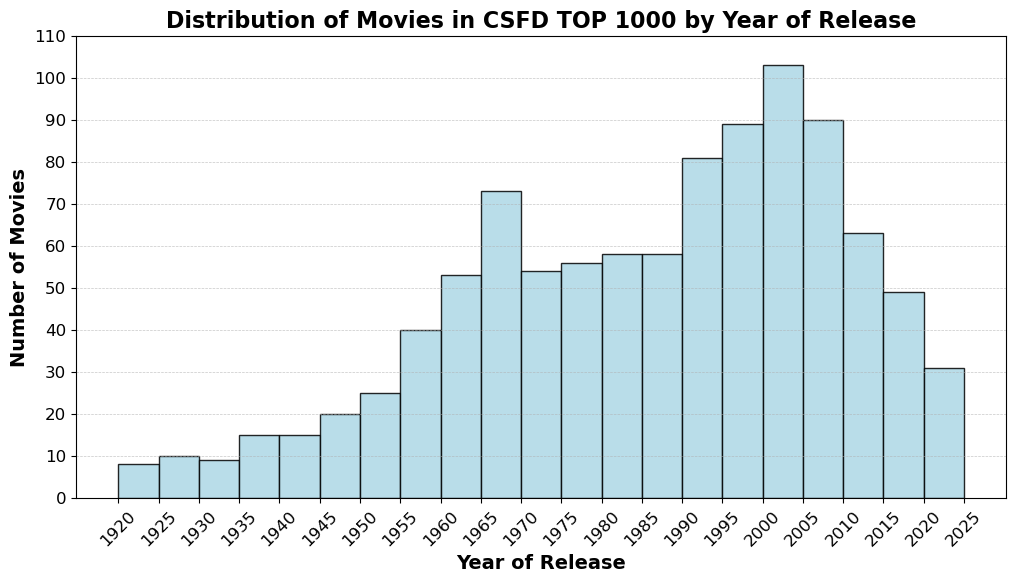

In [29]:
import matplotlib.pyplot as plt

# Vytvoření histogramu
plt.figure(figsize=(12,6))
plt.hist(df["year"], bins=range(1920, 2030, 5), color="lightblue", edgecolor="black", alpha=0.85)  # Modro-fialová

# Mřížka a osy
plt.grid(axis="y", linestyle="--", linewidth=0.5, alpha=0.7)
plt.xticks(range(1920, 2030, 5), rotation=45, fontsize=12)
plt.yticks(range(0, 120, 10), fontsize=12)

# Popisky os
plt.xlabel("Year of Release", fontsize=14, fontweight="bold")
plt.ylabel("Number of Movies", fontsize=14, fontweight="bold")

# Nadpis grafu
plt.title("Distribution of Movies in CSFD TOP 1000 by Year of Release", fontsize=16, fontweight="bold")

# Uložení grafu ve vyšší kvalitě
plt.savefig("histogram.png", dpi=300, bbox_inches="tight")

# Zobrazení grafu
plt.show()

In [30]:
# Průměrné hodnocení filmů v jednotlivých letech
# ------------------------------------------------

rating_by_years_df = df.groupby(df["year"])["rating_average"].mean().reset_index()
print (rating_by_years_df)

     year  rating_average
0    1920       84.700000
1    1921       84.566667
2    1922       84.200000
3    1923       84.200000
4    1924       85.300000
..    ...             ...
98   2020       83.966667
99   2021       81.833333
100  2022       86.000000
101  2023       84.037500
102  2024       84.800000

[103 rows x 2 columns]


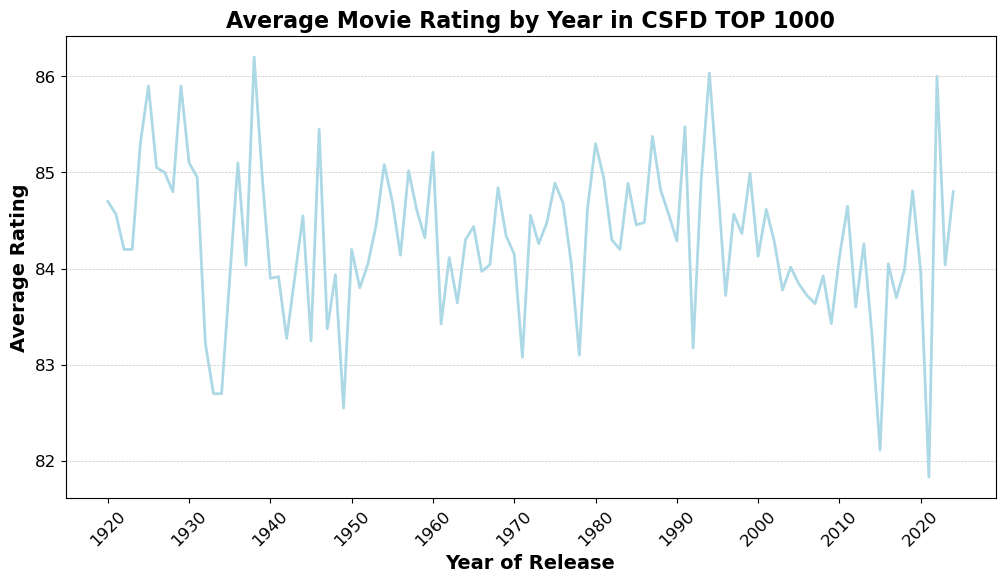

In [31]:
import matplotlib.pyplot as plt

# Vytvoření vylepšeného line grafu
plt.figure(figsize=(12, 6))
plt.plot(rating_by_years_df["year"], rating_by_years_df["rating_average"], color="lightblue", linewidth=2)  # Jemná modrá barva, silnější čára

# Mřížka a osy
plt.grid(axis="y", linestyle="--", linewidth=0.5, alpha=0.7)  # Jemná mřížka pouze na Y ose
plt.xticks(range(1920, 2030, 10), rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Popisky os
plt.xlabel("Year of Release", fontsize=14, fontweight="bold")
plt.ylabel("Average Rating", fontsize=14, fontweight="bold")

# Nadpis grafu
plt.title("Average Movie Rating by Year in CSFD TOP 1000", fontsize=16, fontweight="bold")

# Uložení ve vyšší kvalitě
plt.savefig("rating_trend.png", dpi=300, bbox_inches="tight")

# Zobrazení grafu
plt.show()

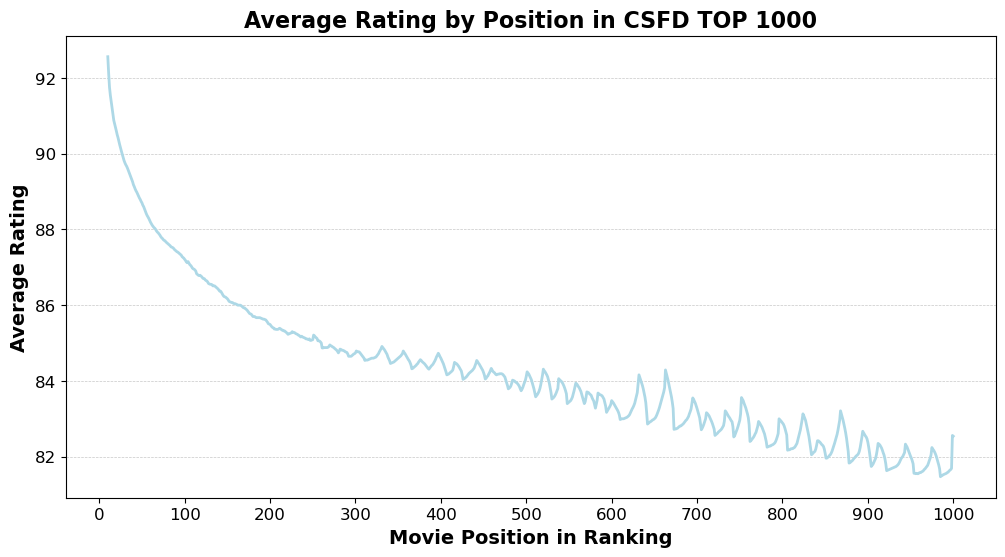

In [32]:
# Jaké měl film hodnocení podle pozice? 
# ------------------------------------------------

import matplotlib.pyplot as plt

# Použití klouzavého průměru pro vyhlazení
df["rating_smooth"] = df["rating_average"].rolling(10).mean()  # 10 pozic klouzavý průměr

# Vytvoření vylepšeného grafu
plt.figure(figsize=(12, 6))
plt.plot(df["position"], df["rating_smooth"], color="lightblue", linewidth=2)  # Lightblue + hladší křivka

# Mřížka a osy
plt.grid(axis="y", linestyle="--", linewidth=0.5, alpha=0.7)
plt.xticks(range(0, 1001, 100), fontsize=12)
plt.yticks(fontsize=12)

# Popisky os
plt.xlabel("Movie Position in Ranking", fontsize=14, fontweight="bold")
plt.ylabel("Average Rating", fontsize=14, fontweight="bold")

# Nadpis grafu
plt.title("Average Rating by Position in CSFD TOP 1000", fontsize=16, fontweight="bold")

# Uložení ve vyšší kvalitě
plt.savefig("rating_position.png", dpi=300, bbox_inches="tight")

# Zobrazení grafu
plt.show()
# Zubatá pila znamená, že je tam nekonzistence v hodnocení. Algoritmus výpočtu procent filmu zasahuje i počet shlédnutí

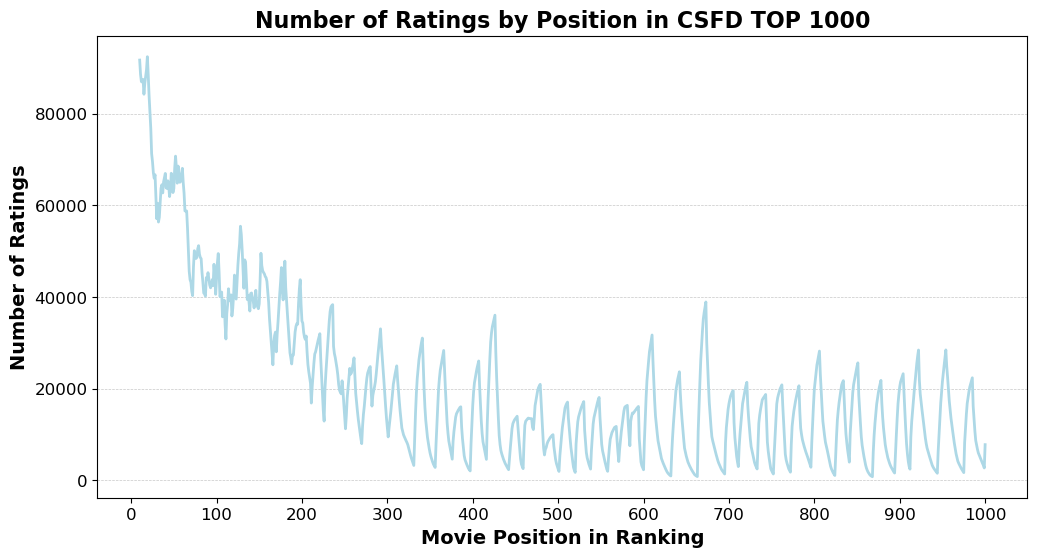

In [33]:
# Počet hodnocení podle pozice v TOP 1000
# ------------------------------------------------

import matplotlib.pyplot as plt

# Použití klouzavého průměru pro vyhlazení
df["rating_total_smooth"] = df["rating_total"].rolling(10).mean()  # 10 pozic klouzavý průměr

# Vytvoření vylepšeného grafu
plt.figure(figsize=(12, 6))
plt.plot(df["position"], df["rating_total_smooth"], color="lightblue", linewidth=2)  # Lightblue + hladší křivka

# Mřížka a osy
plt.grid(axis="y", linestyle="--", linewidth=0.5, alpha=0.7)
plt.xticks(range(0, 1001, 100), fontsize=12)
plt.yticks(fontsize=12)

# Popisky os
plt.xlabel("Movie Position in Ranking", fontsize=14, fontweight="bold")
plt.ylabel("Number of Ratings", fontsize=14, fontweight="bold")

# Nadpis grafu
plt.title("Number of Ratings by Position in CSFD TOP 1000", fontsize=16, fontweight="bold")

# Uložení ve vyšší kvalitě
plt.savefig("rating_count.png", dpi=300, bbox_inches="tight")

# Zobrazení grafu
plt.show()

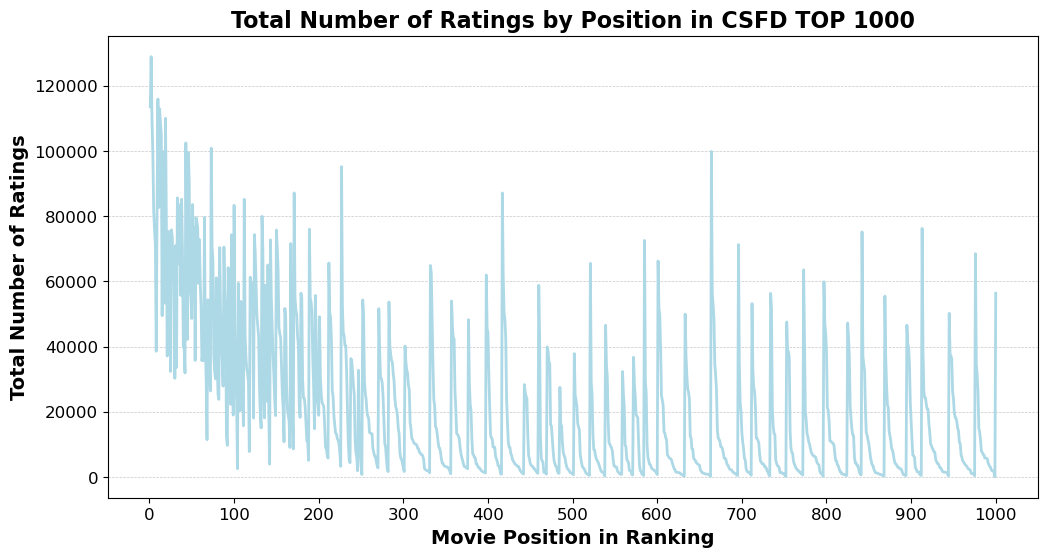

In [34]:
# Počet hodnocených filmů v jednotlivých letech
# ------------------------------------------------

import matplotlib.pyplot as plt

# Vytvoření vylepšeného grafu BEZ klouzavého průměru
plt.figure(figsize=(12, 6))
plt.plot(df["position"], df["rating_total"], color="lightblue", linewidth=2)  # Lightblue barva, silnější čára

# Mřížka a osy
plt.grid(axis="y", linestyle="--", linewidth=0.5, alpha=0.7)
plt.xticks(range(0, 1001, 100), fontsize=12)
plt.yticks(fontsize=12)

# Popisky os
plt.xlabel("Movie Position in Ranking", fontsize=14, fontweight="bold")
plt.ylabel("Total Number of Ratings", fontsize=14, fontweight="bold")

# Nadpis grafu
plt.title("Total Number of Ratings by Position in CSFD TOP 1000", fontsize=16, fontweight="bold")

# Uložení ve vyšší kvalitě
plt.savefig("rating_count.png", dpi=300, bbox_inches="tight")

# Zobrazení grafu
plt.show()

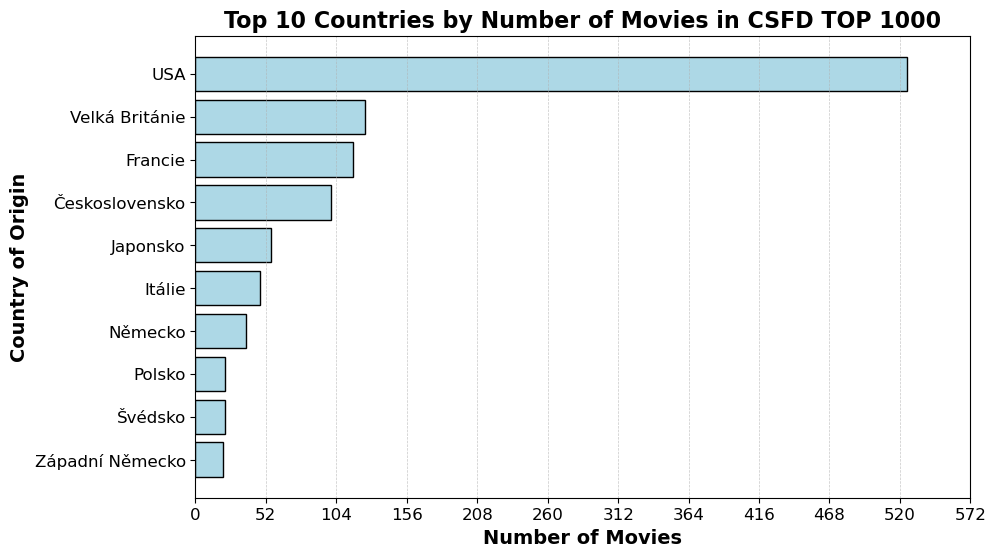

In [35]:
# Počet zemí původu jednotlivých filmů
# ------------------------------------------------
import matplotlib.pyplot as plt
import numpy as np

# Omezení na prvních 10 zemí
top_countries = country_counts_df.head(10).sort_values('Count', ascending=True)

# Dynamické nastavení kroku osy X
max_count = top_countries['Count'].max()
step_size = max(5, max_count // 10)  # Minimální krok 5, jinak 1/10 max hodnoty

# Vytvoření vylepšeného barového grafu
plt.figure(figsize=(10, 6))  
plt.barh(top_countries['Country'], top_countries['Count'], color="lightblue", edgecolor="black")  # Lightblue + obrysy

# Přidání názvů os a titulku
plt.xlabel("Number of Movies", fontsize=14, fontweight="bold")
plt.ylabel("Country of Origin", fontsize=14, fontweight="bold")
plt.title("Top 10 Countries by Number of Movies in CSFD TOP 1000", fontsize=16, fontweight="bold")

# Nastavení osy X
plt.xticks(np.arange(0, max_count + step_size, step_size), fontsize=12)
plt.yticks(fontsize=12)

# Přidání jemné mřížky
plt.grid(axis="x", linestyle="--", linewidth=0.5, alpha=0.7)

# Uložení ve vyšší kvalitě
plt.savefig("top_countries.png", dpi=300, bbox_inches="tight")

# Zobrazení grafu
plt.show()


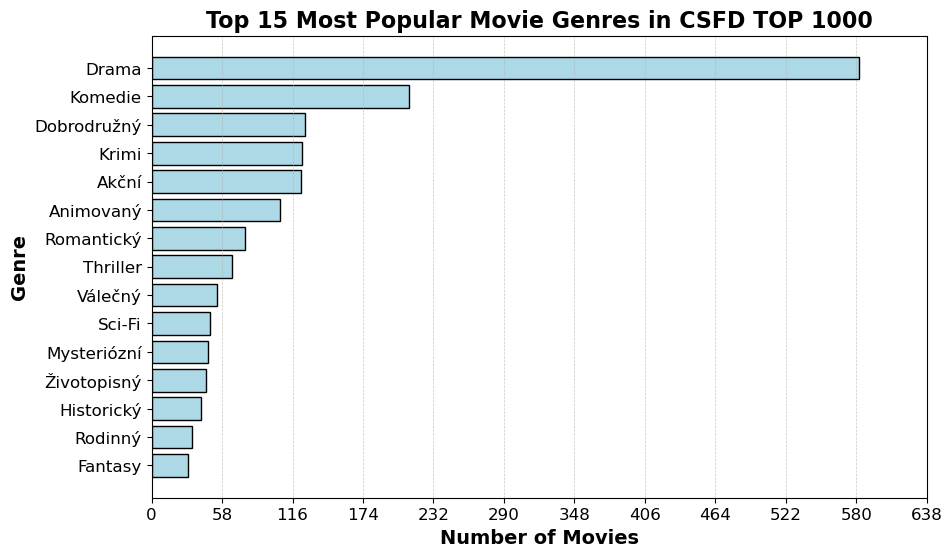

In [36]:
# Počet žánrů v TOP 1000
# ------------------------------------------------
import matplotlib.pyplot as plt
import numpy as np

# Omezení na prvních 15 žánrů
top_genres = genres_counts_df.head(15).sort_values('Count', ascending=True)

# Dynamické nastavení kroku osy X
max_count = top_genres["Count"].max()
step_size = max(5, max_count // 10)  # Minimální krok 5, jinak 1/10 max hodnoty

# Vytvoření vylepšeného barového grafu
plt.figure(figsize=(10, 6))
plt.barh(top_genres["Genre"], top_genres["Count"], color="lightblue", edgecolor="black")  # Lightblue + obrysy

# Přidání názvů os a titulku
plt.xlabel("Number of Movies", fontsize=14, fontweight="bold")
plt.ylabel("Genre", fontsize=14, fontweight="bold")
plt.title("Top 15 Most Popular Movie Genres in CSFD TOP 1000", fontsize=16, fontweight="bold")

# Nastavení osy X
plt.xticks(np.arange(0, max_count + step_size, step_size), fontsize=12)
plt.yticks(fontsize=12)

# Přidání jemné mřížky
plt.grid(axis="x", linestyle="--", linewidth=0.5, alpha=0.7)

# Uložení ve vyšší kvalitě
plt.savefig("top_genres.png", dpi=300, bbox_inches="tight")

# Zobrazení grafu
plt.show()

In [37]:
# SCRAPPING Z PODSTRÁNEK
# ---------------------------------------------------------------------------------------------

In [38]:
!pip install requests


In [39]:
import requests
import os
from bs4 import BeautifulSoup

In [40]:
# Cesta ke složce s offline HTML soubory
folder_path = "pages"

# Najdeme všechny odkazy na filmy
film_links = []

# Iterace přes všechny soubory ve složce
for filename in os.listdir(folder_path):
    if filename.endswith(".html"):  # Načteme jen soubory s příponou .html
        with open(os.path.join(folder_path, filename), encoding="utf-8") as file:
            html = BeautifulSoup(file.read(), "html.parser")
            
            # Najdeme všechny odkazy na filmy
            for a in html.find_all("a", class_="film-title-name"):
                link = a["href"]  # Extrahujeme href (odkaz)
                full_link = "https://www.csfd.cz" + link  # Přidáme základní URL
                film_links.append(full_link)

# Kontrola prvních 5 odkazů
print(film_links[:5])

# Počet extrahovaných odkazů
print(f"Number of Extracted Links: {len(film_links)}")

['https://www.csfd.cz/film/2294-vykoupeni-z-veznice-shawshank/', 'https://www.csfd.cz/film/10135-forrest-gump/', 'https://www.csfd.cz/film/2292-zelena-mile/', 'https://www.csfd.cz/film/2671-sedm/', 'https://www.csfd.cz/film/2982-prelet-nad-kukaccim-hnizdem/']
Number of Extracted Links: 1000


In [41]:
# STAŽENÍ PODSTRÁNEK
# -----------------------------------

# Cesta ke složce, kam se uloží podstránky
subpage_folder = "subpages"

# Vytvoření složky
os.makedirs(subpage_folder, exist_ok=True)

# Funkce na stažení podstránek
def save_subpages(film_links):
    for i, link in enumerate(film_links):
        response = requests.get(link, headers={"User-Agent": "Mozilla/5.0"})
        if response.status_code == 200:  # Kontrola, zda je stránka dostupná
            filename = os.path.join(subpage_folder, f"film_{i+1}.html")
            with open(filename, "w", encoding="utf-8") as file:
                file.write(response.text)

# Zavolání funkce pro stahování podstránek
save_subpages(film_links)

# Na pozadí se stahují do nové složky podstránky - 1000 ks

In [42]:
# EXTRAKCE Z JEDNÉ PODSTRÁNKY
# --------------------------------

# URL jedné podstránky
file_path = "subpages/film_1.html"

# Načtení HTML souboru
with open(file_path, encoding="utf-8") as file:
    film_html = BeautifulSoup(file.read(), "html.parser")

# Najdeme sekci s předlohou
book_draft = film_html.find("h4", string="Předloha:")  # Najde <h4> s textem "Source Material:"
if book_draft:
    writer = book_draft.find_next("a").text.strip()  # Najde <a> následující za <h4>
    print("Source Material:", writer)
else:
    print("Source Material not found.")

# Sekce s režisérem
director = film_html.find("h4", string="Režie:")  # Najde <h4> s textem "Režie:"
if director:
    director = director.find_next("a").text.strip()  # Najde <a> následující za <h4>
    print("Director:", director)
else:
    print("Director not found.")

# Délka filmu
duration = film_html.find('div', class_='origin')
if duration:
    # Získáme pouze text obsahu
    film_text = duration.text.strip()
    
    # Extrakce délky filmu (např. '142 min')
    film_length = int(film_text.split(",")[-1].strip().replace("min", ""))  # Vezme poslední část textu za čárkou
    print("Movie Duration:", film_length)
else:
    print("Movie Duration not found.")



Source Material: Stephen King
Director: Frank Darabont
Movie Duration: 142


In [43]:
import re

def get_info():
    # Vytvoření prázdného seznamu filmů
    movies_info = []

    for i, film_url in enumerate(film_links):  # Iterujeme přes odkazy (nahradíme je za offline soubory)
        file_path = f"subpages/film_{i+1}.html"  # Cesta k offline souboru (názvy odpovídají pořadí odkazů)
        
        # Načtení HTML souboru
        with open(file_path, encoding="utf-8") as file:
            film_html = BeautifulSoup(file.read(), "html.parser")
    
        # Najdeme sekci s předlohou
        book_draft_section = film_html.find("h4", string="Předloha:")  # Najde <h4> s textem "Source Material:"
        if book_draft_section:
            book_draft = book_draft_section.find_next("a").text.strip()
        else:
            book_draft = None
    
        # Sekce s režisérem
        director_section = film_html.find("h4", string="Režie:")  # Najde <h4> s textem "Režie:"
        if director_section:
            director = director_section.find_next("a").text.strip()
        else:
            director = None
                 
        duration_section = film_html.find('div', class_='origin')
        if duration_section:
            film_text = duration_section.text.strip()
            
            # Použití regulárního výrazu pro extrakci prvního čísla
            match = re.search(r'\d+', film_text.split(",")[-1].strip())
            if match:
                duration = int(match.group())  # Extrahované číslo
            else:
                duration = None  # Pokud číslo není nalezeno
        else:
            duration = None

        # Přidávání do seznamu podle toho, co v něm chci mít
        movies_info.append({
            "book_draft": book_draft,
            "director": director,
            "duration": duration,
        })

    return movies_info




In [44]:
movies = get_info()
print(movies[:1])  # Zobrazí první záznam

[{'book_draft': 'Stephen King', 'director': 'Frank Darabont', 'duration': 142}]


In [45]:
# ULOŽENÍ KOMPLET SOUBORU DO CSV
# ----------------------------------------------------
import pandas as pd

# Stažení dat pomocí funkce get_info
movies_info = get_info()

# Vytvoření DataFrame
df_info = pd.DataFrame(movies_info)

# Přidání sloupce Position (číslování od 1)
df_info.insert(0, "position", range(1, len(df) + 1))

# Uložení DataFrame do CSV
df_info.to_csv("movies_info.csv", index=False)

print("The data has been saved to a file 'movies_info.csv'.")

The data has been saved to a file 'movies_info.csv'.


In [46]:
# Načtení dat z CSV souboru
df_info = pd.read_csv("movies_info.csv")

# Zobrazení prvních 5 řádků pro kontrolu
print(df_info.head())

   position     book_draft         director  duration
0         1   Stephen King   Frank Darabont       142
1         2  Winston Groom  Robert Zemeckis       142
2         3   Stephen King   Frank Darabont       188
3         4            NaN    David Fincher       127
4         5      Ken Kesey     Miloš Forman       133


In [47]:
# Načtení dat z CSV souboru
df_info = pd.read_csv("movies_info.csv")

# Kontrola počtu hodnot NaN v jednotlivých sloupcích
nan_counts = df_info.isnull().sum()

# Zobrazení výsledku
print("Number of NaN Values in Each Column:")
print(nan_counts)


Number of NaN Values in Each Column:
position        0
book_draft    607
director        0
duration        0
dtype: int64


In [48]:
# Vytvoření dataframu ze stažených dat
# -------------------------------------------
df_info = pd.DataFrame(movies_info)
df_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   book_draft  393 non-null    object
 1   director    1000 non-null   object
 2   duration    1000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [49]:
df_info.head()

,book_draft,director,duration
0,Stephen King,Frank Darabont,142
1,Winston Groom,Robert Zemeckis,142
2,Stephen King,Frank Darabont,188
3,None,David Fincher,127
4,Ken Kesey,Miloš Forman,133


In [50]:
# Který režisér se vyskytuje nejčastěji v TOP 1000? 

all_directors = df_info['director']

# Odstranění prázdných hodnot (None) a zbytečných mezer
all_directors = [director.strip() for director in all_directors if pd.notnull(director)]
# print (all_directors)

# # Zjištění četnosti výskytu
from collections import Counter
director_counts = Counter(all_directors)
# print (director_counts)

# # Nejvyšší četnost TOP 25 režisérů (půjde do PDF)
most_common_director = director_counts.most_common(25)
print (most_common_director)

[('Martin Frič', 14), ('Steven Spielberg', 12), ('Billy Wilder', 10), ('Akira Kurosawa', 10), ('Christopher Nolan', 9), ('Oldřich Lipský', 9), ('Martin Scorsese', 9), ('Ingmar Bergman', 9), ('Miloš Forman', 8), ('Stanley Kubrick', 8), ('Karel Zeman', 8), ('Hajao Mijazaki', 8), ('Charlie Chaplin', 8), ('Ridley Scott', 7), ('Alfred Hitchcock', 7), ('Robert Zemeckis', 6), ('James Cameron', 6), ('Clint Eastwood', 6), ('Jiří Menzel', 6), ('William Wyler', 6), ('Bryan Singer', 6), ('Tim Burton', 6), ('Woody Allen', 6), ('David Fincher', 5), ('Francis Ford Coppola', 5)]


In [51]:
# Který spisovatel se vyskytuje nejčastěji v TOP 1000? 

all_writers = df_info['book_draft']

# Odstranění prázdných hodnot (None) a zbytečných mezer
all_writers = [book_draft.strip() for book_draft in all_writers if pd.notnull(book_draft)]
# print (all_writers)

# # Zjištění četnosti výskytu
from collections import Counter
writer_counts = Counter(all_writers)
# print (writer_counts)

# # Nejvyšší četnost TOP 25 autorů předloh (půjde do PDF)
most_common_writer = writer_counts.most_common(25)
print (most_common_writer)

[('Stan Lee', 6), ('Stephen King', 5), ('René Goscinny', 5), ('J.R.R. Tolkien', 4), ('Božena Němcová', 4), ('Jules Verne', 4), ('Bohumil Hrabal', 4), ('Marcel Pagnol', 4), ('Masamune Širó', 4), ('Bob Kane', 3), ('Robert Ludlum', 3), ('Pierre Boulle', 3), ('Jan Procházka', 3), ('Karl May', 3), ('Kentaró Miura', 3), ('Lev Nikolajevič Tolstoj', 3), ('Alexandre Dumas st.', 3), ('Mario Puzo', 2), ('Jan Drda', 2), ('Jaroslav Žák', 2), ('Nicholas Pileggi', 2), ('Dennis Lehane', 2), ('William Steig', 2), ('Frank Herbert', 2), ('Armitage Trail', 2)]


In [52]:
# SOUVISÍ DÉLKA FILMU S TÍM, ŽE JE FILM V TOP 1000? 
# ---------------------------------------------------------

# Spojení dvou sloupců z různých tabulek:
# movies - sloupec rating_average (formát xls)
# movies_info - sloupec duration (formát csv)
# obě tabulky mají shodný sloupec position, který funguje jako klíč. 

# Načtení souborů
movies = pd.read_excel("movies.xlsx")  # XLS tabulka
movies_info = pd.read_csv("movies_info.csv")  # CSV tabulka

# Spojení tabulek podle sloupce 'position'
merged_df = pd.merge(movies, movies_info, on='position')

# Kontrola výsledné tabulky a vyfiltrování sloupců které chci
filtered_df = merged_df.filter(items=['position', 'rating_average', 'duration'])
print(filtered_df.head())

   position  rating_average  duration
0         1            95.4       142
1         2            94.4       142
2         3            92.9       188
3         4            92.4       127
4         5            92.4       133


In [53]:
# Kontrola NaN hodnot ve sloupcích 'rating_average' a 'duration'
print(merged_df[['rating_average', 'duration']].isnull().sum())

# Odstranění řádků s NaN v uvedených sloupcích (jen pro sichr, mělo by to být ok)
cleaned_df = merged_df.dropna(subset=['rating_average', 'duration'])

filtered_df = cleaned_df.filter(items=['position', 'rating_average', 'duration'])
print(filtered_df.head())

rating_average    0
duration          0
dtype: int64
   position  rating_average  duration
0         1            95.4       142
1         2            94.4       142
2         3            92.9       188
3         4            92.4       127
4         5            92.4       133


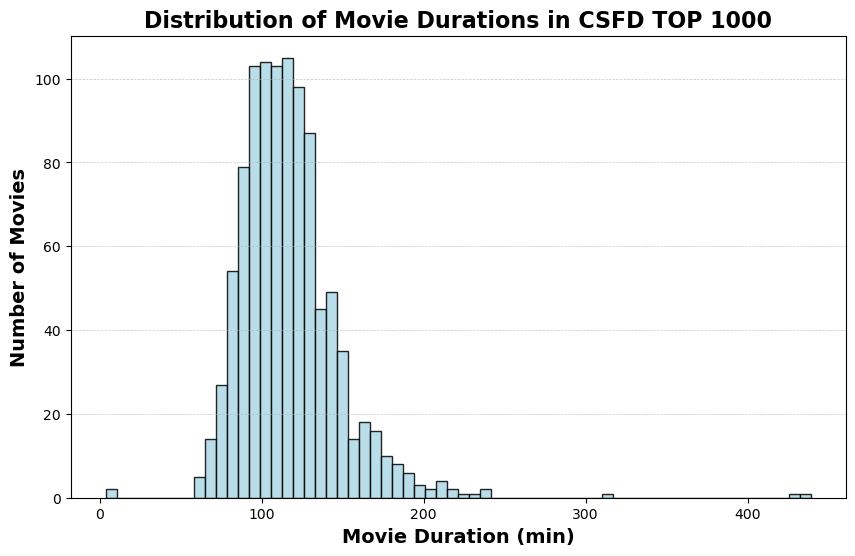

In [54]:
# Histogram délky filmů
import matplotlib.pyplot as plt
import numpy as np

# Dynamické nastavení binů
bins = np.histogram_bin_edges(filtered_df["duration"], bins="auto")

# Vytvoření vylepšeného histogramu
plt.figure(figsize=(10, 6))
plt.hist(filtered_df["duration"], bins=bins, color="lightblue", edgecolor="black", alpha=0.85)  # Lightblue + černé obrysy

# Přidání názvů os a titulku
plt.xlabel("Movie Duration (min)", fontsize=14, fontweight="bold")
plt.ylabel("Number of Movies", fontsize=14, fontweight="bold")
plt.title("Distribution of Movie Durations in CSFD TOP 1000", fontsize=16, fontweight="bold")

# Přidání jemné mřížky
plt.grid(axis="y", linestyle="--", linewidth=0.5, alpha=0.7)

# Uložení ve vyšší kvalitě
plt.savefig("movie_duration.png", dpi=300, bbox_inches="tight")

# Zobrazení grafu
plt.show()

In [55]:
# Výpočet korelace mezi délkou a hodnocením
# Korelace blízká 1 znamená silnou pozitivní závislost.
# Korelace blízká -1 znamená silnou negativní závislost.
# Korelace blízká 0 znamená, že mezi proměnnými není žádná lineární závislost.

# Metoda .corr() spočítá Pearsonovu korelaci mezi dvěma numerickými sloupci.
# {correlation:.2f} - Výstup formátovaný na 2 desetinná místa

correlation = filtered_df['duration'].corr(filtered_df['rating_average'])
print(f"Correlation Between Film Length and Rating: {correlation:.2f}")

Correlation Between Film Length and Rating: 0.13


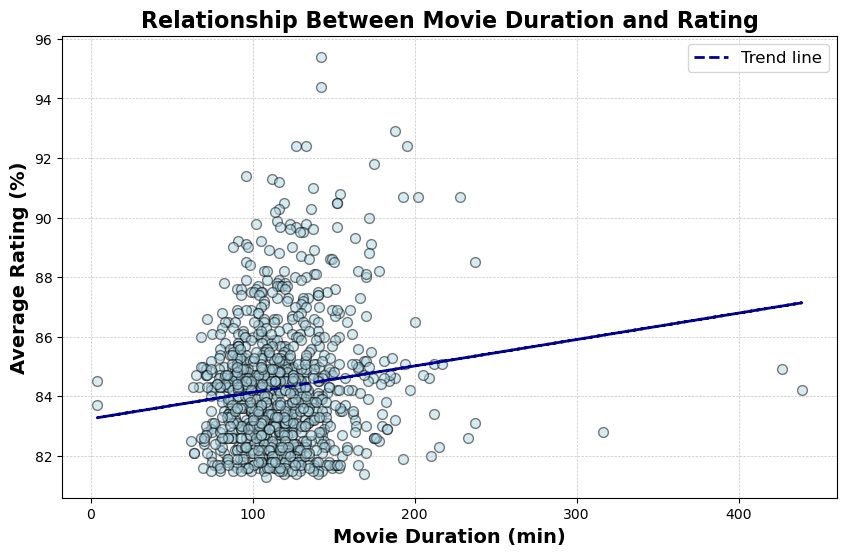

In [56]:
# Rozptylový graf délky filmu vs hodnocení

import matplotlib.pyplot as plt
import numpy as np

# Vytvoření vylepšeného rozptylového grafu
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df["duration"], filtered_df["rating_average"], color="lightblue", edgecolors="black", alpha=0.5, s=50)  # Lightblue + černé obrysy

# Přidání trendové čáry (volitelně)
z = np.polyfit(filtered_df["duration"], filtered_df["rating_average"], 1)
p = np.poly1d(z)
plt.plot(filtered_df["duration"], p(filtered_df["duration"]), color="darkblue", linewidth=2, linestyle="--", label="Trend line")

# Přidání názvů os a titulku
plt.xlabel("Movie Duration (min)", fontsize=14, fontweight="bold")
plt.ylabel("Average Rating (%)", fontsize=14, fontweight="bold")
plt.title("Relationship Between Movie Duration and Rating", fontsize=16, fontweight="bold")

# Přidání legendy (pokud je trendová čára)
plt.legend(fontsize=12)

# Přidání jemné mřížky
plt.grid(axis="both", linestyle="--", linewidth=0.5, alpha=0.7)

# Uložení ve vyšší kvalitě
plt.savefig("duration_vs_rating.png", dpi=300, bbox_inches="tight")

# Zobrazení grafu
plt.show()

In [57]:
# JSOU LÉPE HODNOCENY FILMY PODLE KNIŽNÍ PŘEDLOHY? 
# --------------------------------------------------------

# Počet prázdných hodnot - původních scénářů (607)
print(df_info['book_draft'].isnull().sum())


607


In [58]:
# Změním None na "Original Screenplay"
df_info['book_draft'] = df_info['book_draft'].fillna('Original Screenplay')

# Kontrola, zda je mezi nimi None
print(None in df_info['book_draft'].unique())

False


In [59]:
df_info.head()

,book_draft,director,duration
0,Stephen King,Frank Darabont,142
1,Winston Groom,Robert Zemeckis,142
2,Stephen King,Frank Darabont,188
3,Original Screenplay,David Fincher,127
4,Ken Kesey,Miloš Forman,133


In [60]:
# Načtení Excelové tabulky
movies = pd.read_excel("movies.xlsx")  # Obsahuje rating_average

# Načtení CSV tabulky
movies_info = pd.read_csv("movies_info.csv")  # Obsahuje book_draft

# Spojení tabulek podle klíče 'position'
merged_df = pd.merge(movies, movies_info, on='position')

# Z tabulky si vytáhnu jen sloupce, které potřebuji
filtered_df = merged_df.filter(items=['position', 'rating_average', 'book_draft'])

# Změním None na "Original Screenplay"
filtered_df['book_draft'] = filtered_df['book_draft'].fillna('Original Screenplay')

# Kontrola výsledku
print(filtered_df.head())

   position  rating_average           book_draft
0         1            95.4         Stephen King
1         2            94.4        Winston Groom
2         3            92.9         Stephen King
3         4            92.4  Original Screenplay
4         5            92.4            Ken Kesey


In [61]:
# Rozdělení na hlavní kategorie
filtered_df['category'] = filtered_df['book_draft'].apply(
    lambda x: 'Book Adaptation' if x != 'Original Screenplay' else 'Original Screenplay'
)

# Kontrola výsledku
print(filtered_df[['book_draft', 'category']].head())

            book_draft             category
0         Stephen King      Book Adaptation
1        Winston Groom      Book Adaptation
2         Stephen King      Book Adaptation
3  Original Screenplay  Original Screenplay
4            Ken Kesey      Book Adaptation


In [62]:
# Vypočítání průměrného hodnocení podle hlavní kategorie
average_ratings = filtered_df.groupby('category')['rating_average'].mean()

# Zobrazení výsledku
print(average_ratings)

category
Book Adaptation        84.378880
Original Screenplay    84.222076
Name: rating_average, dtype: float64


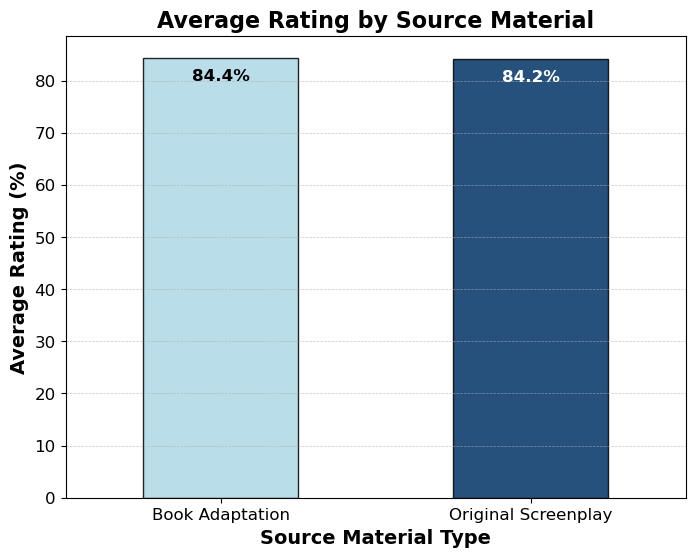

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# Barvy: Lightblue + Dark blue
colors = ["lightblue", "#003366"]

# Vykreslení vylepšeného barového grafu
plt.figure(figsize=(8,6))
bars = average_ratings.plot(kind="bar", color=colors, alpha=0.85, edgecolor="black")

# Přidání názvů os a titulku
plt.title("Average Rating by Source Material", fontsize=16, fontweight="bold")
plt.ylabel("Average Rating (%)", fontsize=14, fontweight="bold")
plt.xlabel("Source Material Type", fontsize=14, fontweight="bold")
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Přidání jemné mřížky
plt.grid(axis="y", linestyle="--", linewidth=0.5, alpha=0.7)

# Funkce pro automatickou volbu barvy textu
def get_text_color(color):
    r, g, b = plt.matplotlib.colors.to_rgb(color)  # Získání RGB složek
    brightness = r * 0.299 + g * 0.587 + b * 0.114  # Vzorec pro jas
    return "white" if brightness < 0.5 else "black"  # Pokud je sloupec tmavý → bílý text

# Přidání hodnot na sloupce
for bar, color in zip(bars.patches, colors):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Střed sloupce
        height - 2,  # Lehce pod vrcholem sloupce
        f"{height:.1f}%",  # Formát čísel
        ha="center", va="top", fontsize=12, fontweight="bold",
        color=get_text_color(color)  # Automatický výběr barvy textu
    )

# Uložení ve vyšší kvalitě
plt.savefig("average_rating_source_material.png", dpi=300, bbox_inches="tight")

# Zobrazení grafu
plt.show()

In [64]:
# Vypočítání mediánu hodnocení podle kategorie
median_ratings = filtered_df.groupby('category')['rating_average'].median()

# Zobrazení výsledku
print(median_ratings)

category
Book Adaptation        84.0
Original Screenplay    84.0
Name: rating_average, dtype: float64


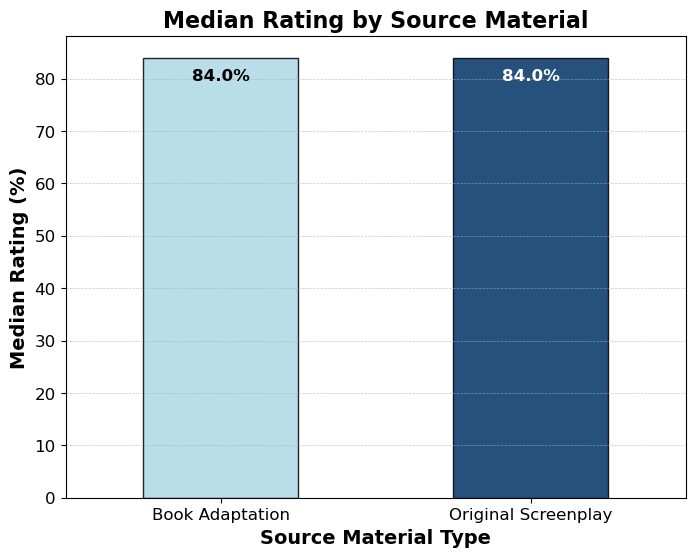

In [65]:
import matplotlib.pyplot as plt
import numpy as np

# Barvy: Lightblue + Dark Blue
colors = ["lightblue", "#003366"]

# Vykreslení vylepšeného barového grafu
plt.figure(figsize=(8,6))
bars = median_ratings.plot(kind="bar", color=colors, alpha=0.85, edgecolor="black")

# Přidání názvů os a titulku
plt.title("Median Rating by Source Material", fontsize=16, fontweight="bold")
plt.ylabel("Median Rating (%)", fontsize=14, fontweight="bold")
plt.xlabel("Source Material Type", fontsize=14, fontweight="bold")
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Přidání jemné mřížky
plt.grid(axis="y", linestyle="--", linewidth=0.5, alpha=0.7)

# Funkce pro automatickou volbu barvy textu
def get_text_color(color):
    r, g, b = plt.matplotlib.colors.to_rgb(color)  # Získání RGB složek
    brightness = r * 0.299 + g * 0.587 + b * 0.114  # Vzorec pro jas
    return "white" if brightness < 0.5 else "black"  # Pokud je sloupec tmavý → bílý text

# Přidání hodnot na sloupce
for bar, color in zip(bars.patches, colors):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Střed sloupce
        height - 2,  # Lehce pod vrcholem sloupce
        f"{height:.1f}%",  # Formát čísel
        ha="center", va="top", fontsize=12, fontweight="bold",
        color=get_text_color(color)  # Automatický výběr barvy textu
    )

# Uložení ve vyšší kvalitě
plt.savefig("median_rating_source_material.png", dpi=300, bbox_inches="tight")

# Zobrazení grafu
plt.show()

In [66]:
# Spočítání počtu filmů podle typu předlohy
category_counts = filtered_df['category'].value_counts()

# Zobrazení výsledku
print(category_counts)

category
Original Screenplay    607
Book Adaptation        393
Name: count, dtype: int64


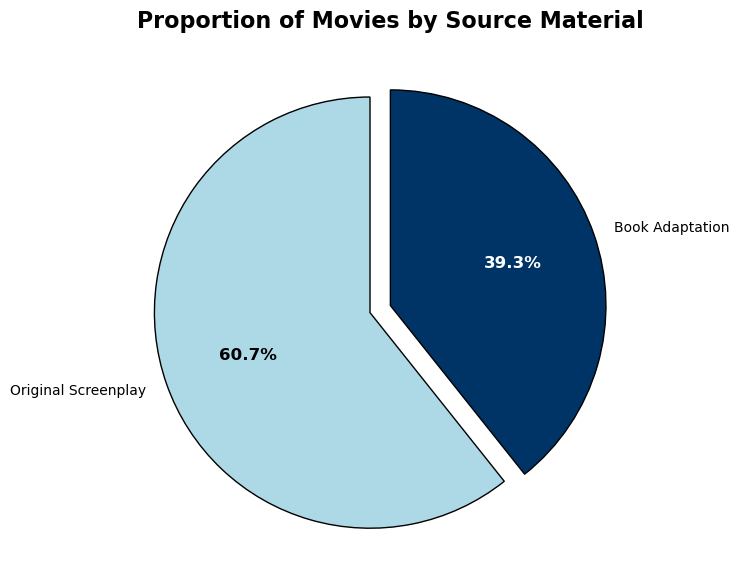

In [67]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors  

# Data pro koláčový graf
labels = category_counts.index  # Názvy kategorií
sizes = category_counts.values  # Počet filmů v každé kategorii
colors = ["lightblue", "#003366"]  # Lightblue + Dark Blue
explode = (0.1, 0)  # Zvýraznění první části koláče (stejně jako v druhém grafu)

# Funkce pro automatickou změnu barvy textu podle jasu segmentu
def get_text_color(color):
    r, g, b = mcolors.to_rgb(color)
    brightness = r * 0.299 + g * 0.587 + b * 0.114
    return "white" if brightness < 0.5 else "black"

# Automatické určení barvy textu pro každý segment
text_colors = [get_text_color(c) for c in colors]

# Vytvoření vylepšeného koláčového grafu s oddělením segmentu
plt.figure(figsize=(7, 7))
wedges, texts, autotexts = plt.pie(
    sizes, 
    labels=labels, 
    autopct="%1.1f%%",  
    startangle=90,    
    colors=colors, 
    explode=explode,  # Přidáno zvýraznění segmentu
    wedgeprops={"edgecolor": "black", "linewidth": 1}  
)

# Nastavení barvy popisků uvnitř koláče
for autotext, color in zip(autotexts, text_colors):
    autotext.set_color(color)
    autotext.set_fontsize(12)
    autotext.set_weight("bold")  

# Přidání titulku
plt.title("Proportion of Movies by Source Material", fontsize=16, fontweight="bold")

# Uložení ve vyšší kvalitě
plt.savefig("pie_chart_source_material_fixed.png", dpi=300, bbox_inches="tight")

# Zobrazení grafu
plt.show()

In [68]:
# Vyfiltrování prvních 100 filmů
top_100_df = filtered_df[filtered_df['position'] <= 100]

# Spočítání počtu filmů podle typu předlohy
top_100_category_counts = top_100_df['category'].value_counts()

# Zobrazení výsledku
print(top_100_category_counts)


category
Original Screenplay    57
Book Adaptation        43
Name: count, dtype: int64


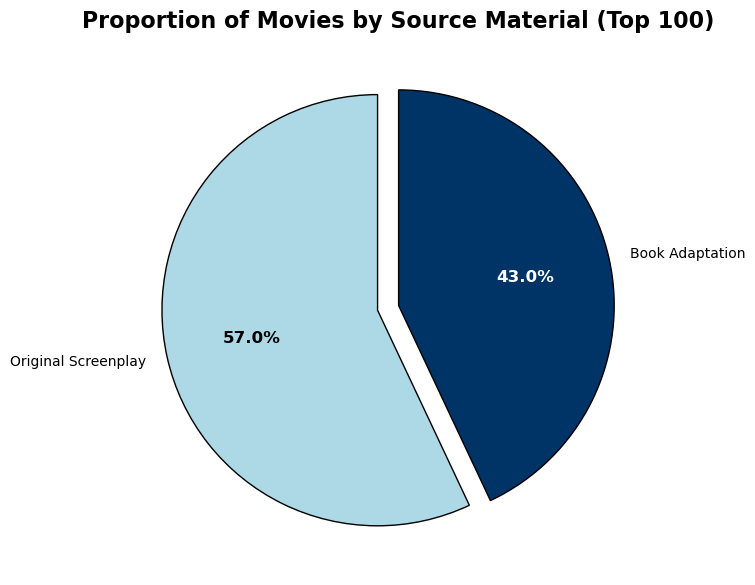

In [69]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors  

# Data pro koláčový graf
labels = top_100_category_counts.index  # Názvy kategorií
sizes = top_100_category_counts.values  # Počet filmů v každé kategorii
colors = ["lightblue", "#003366"]  # Lightblue + Dark Blue
explode = (0.1, 0)  # Zvýraznění první části koláče

# Funkce pro automatickou změnu barvy textu podle jasu segmentu
def get_text_color(color):
    r, g, b = mcolors.to_rgb(color)
    brightness = r * 0.299 + g * 0.587 + b * 0.114
    return "white" if brightness < 0.5 else "black"

# Automatické určení barvy textu pro každý segment
text_colors = [get_text_color(c) for c in colors]

# Vytvoření vylepšeného koláčového grafu
plt.figure(figsize=(7, 7))
wedges, texts, autotexts = plt.pie(
    sizes, 
    labels=labels, 
    autopct="%1.1f%%",  
    startangle=90,    
    colors=colors, 
    explode=explode,
    wedgeprops={"edgecolor": "black", "linewidth": 1}  
)

# Nastavení barvy popisků uvnitř koláče
for autotext, color in zip(autotexts, text_colors):
    autotext.set_color(color)
    autotext.set_fontsize(12)
    autotext.set_weight("bold")  

# Přidání titulku
plt.title("Proportion of Movies by Source Material (Top 100)", fontsize=16, fontweight="bold")

# Uložení ve vyšší kvalitě
plt.savefig("pie_chart_source_material_TOP100.png", dpi=300, bbox_inches="tight")

# Zobrazení grafu
plt.show()

In [109]:
# Generování PDF
# ----------------------
# Úvodní importy a nastavení české diakritiky

import reportlab
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import A4
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image, PageBreak, Table, TableStyle
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
from reportlab.lib import colors
from reportlab.lib.enums import TA_CENTER

from reportlab.pdfbase import pdfmetrics
from reportlab.pdfbase.ttfonts import TTFont

class NumberedCanvas(canvas.Canvas):
    def __init__(self, *args, **kwargs):
        canvas.Canvas.__init__(self, *args, **kwargs)

    def showPage(self):
        """Přidání čísla stránky na každou stránku."""
        self.setFont("Times-Roman", 10)
        self.drawRightString(550, 20, f"Page {self.getPageNumber()}")  # Dynamické číslo
        canvas.Canvas.showPage(self)

# Registrace fontu Times New Roman pro českou diakritiku
pdfmetrics.registerFont(TTFont("TimesNewRoman", "times.ttf"))
pdfmetrics.getRegisteredFontNames()

# Registrace fontů a nastavení stylů
styles = getSampleStyleSheet()
styles["Title"].fontName = "TimesNewRoman"
styles["Heading1"].fontName = "TimesNewRoman"
styles["Heading2"].fontName = "TimesNewRoman"
styles["BodyText"].fontName = "TimesNewRoman"

# Přidání vlastního stylu pro nadpisy (zarovnání na střed)
styles.add(ParagraphStyle(
    name="CenteredHeading",
    parent=styles["Heading1"],
    alignment=TA_CENTER
))

# Nastavení PDF dokumentu s většími okraji a číslováním stránek
pdf_filename = "CSFD_analysis.pdf"

doc = SimpleDocTemplate(
    pdf_filename, 
    pagesize=A4, 
    leftMargin=50,  # Větší okraje
    rightMargin=50,  
    topMargin=50,  
    bottomMargin=50  
)

story = []



In [111]:
# Titulní stránka
# --------------------------------------------------------------------------------------------------------
# Hlavní nadpis
title = Paragraph("Analysis of the ČSFD TOP 1000 Films", styles['Title'])
story.append(title)

# Nastavení mezery
story.append(Spacer(1,25))

# Přidání loga ČSFD
logo = Image("https://img.csfd.cz/documents/marketing/logos/logo-white-black/logo-white-black-small.png")
story.append(logo)

# Nastavení mezery
story.append(Spacer(1,45))

content = [
    {"title": "Basic Graphs", "bookmark": "basic_graphs", "page": 2},
    {"title": "Top 10 Countries of Origin for the Best Films", "bookmark": "country_counts", "page": 4},
    {"title": "Top 15 Most Popular Film Genres", "bookmark": "genres_counts", "page": 5},  # Přidáno "Film"
    {"title": "The Relationship Between Film Runtime and Ratings", "bookmark": "duration_vs_rating", "page": 6},  # "Length" změněno na "Runtime"
    {"title": "Top 25 Directors of the Best Films", "bookmark": "directors", "page": 7},
    {"title": "Top 25 Book Authors Behind the Best Films", "bookmark": "writers", "page": 8},  # Lepší kontext
    {"title": "The Relationship Between Source Material and Film Ratings", "bookmark": "book_draft_vs_rating", "page": 9},  # Přidáno "Film"
    {"title": "Complete List of the TOP 1000 Films", "bookmark": "all_movies", "page": 11}  # Stručnější a přirozenější
]

# Přidání nadpisu Obsah
story.append(Paragraph("Table of Content", styles["Heading2"]))
story.append(Spacer(1, 12))

# Přidání jednotlivých položek obsahu
for item in content:
    link = f'<a href="#{item["bookmark"]}">{item["title"]} (page {item["page"]})</a>'
    story.append(Paragraph(link, styles["BodyText"]))


# Vytvoření nové stránky
story.append(PageBreak())

In [113]:
# STRANA 2 + 3 - Přidání grafů
# ---------------------------------------------

from reportlab.platypus import Spacer, PageBreak

# Nadpis H1
heading = Paragraph("Basic Graphs", styles["CenteredHeading"])
story.append(heading)
story.append(Spacer(1, 20))  # Mezery pod nadpisem

# Přidání záložky přímo do story
story.append(Paragraph('<a name="basic_graphs"/>', styles["BodyText"]))  # Definice záložky

# Funkce pro vložení obrázku se správným rozložením
def add_graph_to_pdf(image_filename, width=400, height=250):
    story.append(Image(image_filename, width, height))
    story.append(Spacer(1, 30))  # Přidání mezery mezi grafy

# První stránka grafů
add_graph_to_pdf("histogram.png")
add_graph_to_pdf("rating_trend.png")

# Nová stránka
story.append(PageBreak())

# Druhá stránka grafů
add_graph_to_pdf("rating_position.png")
add_graph_to_pdf("rating_count.png")

# Další nová stránka, pokud je potřeba
story.append(PageBreak())

In [115]:
# STRANA 4
# Vložení tabulky a grafu (country_counts_df) - 15 nejčastějších zemí původu filmu
# -----------------------------------------------------------------------------------------------------------------

# Nadpis H1
heading = Paragraph("Top 10 Countries of Origin for the Best Films", styles['CenteredHeading'])
story.append(heading)

# Přidání záložky přímo do story
story.append(Paragraph('<a name="country_counts"/>', styles["BodyText"]))  # Definice záložky

# Nastavení mezery
story.append(Spacer(1, 15))

# Vysvětlující odstavec
explanation_text = (
    "The country names are listed in Czech, as the data originates from a Czech website. "
    "Since this ranking represents the most popular films among Czech users, historical countries "
    "that no longer exist today may also appear in the list."
    "Similarly, country names are listed as they were at the time of a film’s release. "
    "For example, movies from the Czech Republic may be listed under 'Česko', 'Československo' "
    "or 'Protektorát Čechy a Morava', depending on the historical period. "
    "Likewise, Germany appears as 'Německo' but also as 'Západní Německo' "
    "to reflect its division before reunification."
)
story.append(Paragraph(explanation_text, styles["BodyText"]))

# Nastavení mezery
story.append(Spacer(1, 25))

# TABULKA
# Přidání sloupce s pozicí začínající od 1 
data = (
    country_counts_df.reset_index(drop=True)  # Resetuje indexy
    .reset_index()                            # Přidá nový sloupec 'index'
    .rename(columns={"index": "Pozice"})      # Přejmenuje sloupec 'index' na 'Pozice'
)
data["Pozice"] += 1  # Posune pozice od 1

# Omezení na prvních 10 zemí
data = data.head(10)

# Převod na seznam seznamů a přidání hlavičky
table_data = [["Position", "Country of Origin", "Number of Appearances"]] + data.values.tolist()

# Styl tabulky - lepší čitelnost
ts = TableStyle([
    ("FONT", (0, 0), (-1, -1), "TimesNewRoman", 10),  # Nastavení písma a velikosti
    ("ALIGN", (0, 0), (-1, -1), "CENTER"),  # Zarovnání textu na střed
    ("BOTTOMPADDING", (0, 0), (-1, -1), 6),  # Větší mezery mezi řádky
    ("BOX", (0, 0), (-1, -1), 1, colors.black),  # Ohraničení celé tabulky
    ("GRID", (0, 0), (-1, -1), 0.5, colors.lightgrey),  # Jemná mřížka v tabulce
    ("BACKGROUND", (0, 0), (-1, 0), colors.lightblue),  # Pozadí hlavičky tabulky
    ("TEXTCOLOR", (0, 0), (-1, 0), colors.black),  # Barva textu v hlavičce na bílou
    ("FONTNAME", (0, 0), (-1, 0), "Times-Bold"),  # Tučné písmo pro hlavičku
])

# Vytvoření tabulky s tímto stylem
table = Table(data=table_data, style=ts, repeatRows=1)

# Přidání tabulky do pdf
story.append(table)

# Nastavení mezery
story.append(Spacer(1,25))

# Graf nejčastějších zemí
zeme = Image("top_countries.png", 500, 300)
story.append(zeme)

# Vytvoření nové stránky
story.append(PageBreak())

In [117]:
# STRANA 5
# Vložení tabulky a grafu (genres_counts_df) - 15 nejčastějších žánrů
# -----------------------------------------------------------------------------------------------------------------

# Nadpis H1
heading = Paragraph("Top 15 Most Popular Genres", styles['CenteredHeading'])
story.append(heading)

# Přidání záložky přímo do story
story.append(Paragraph('<a name="genres_counts"/>', styles["BodyText"]))  # Definice záložky

# Nastavení mezery
story.append(Spacer(1, 10))

# Vysvětlující odstavec
explanation_text = (
    "The genre names are listed in Czech, as the data originates from a Czech website. "
    "Some genres may differ from internationally common naming conventions, "
    "as they reflect the categorization used on the source platform. "
)
story.append(Paragraph(explanation_text, styles["BodyText"]))

# Nastavení mezery
story.append(Spacer(1, 10))

# TABULKA
# Přidání sloupce s pozicí začínající od 1 
data = (
    genres_counts_df.reset_index(drop=True)  # Resetuje indexy
    .reset_index()                            # Přidá nový sloupec 'index'
    .rename(columns={"index": "Pozice"})      # Přejmenuje sloupec 'index' na 'Pozice'
)
data["Pozice"] += 1  # Posune pozice od 1

# Omezení na prvních 15 žánrů
data = data.head(15)

# Převod na seznam seznamů a přidání hlavičky
table_data = [["Position", "Genre", "Number of Appearances"]] + data.values.tolist()

# Styl tabulky - lepší čitelnost
ts = TableStyle([
    ("FONT", (0, 0), (-1, -1), "TimesNewRoman", 10),  # Nastavení písma a velikosti
    ("ALIGN", (0, 0), (-1, -1), "CENTER"),  # Zarovnání textu na střed
    ("BOTTOMPADDING", (0, 0), (-1, -1), 6),  # Větší mezery mezi řádky
    ("BOX", (0, 0), (-1, -1), 1, colors.black),  # Ohraničení celé tabulky
    ("GRID", (0, 0), (-1, -1), 0.5, colors.lightgrey),  # Jemná mřížka v tabulce
    ("BACKGROUND", (0, 0), (-1, 0), colors.lightblue),  # Pozadí hlavičky tabulky
    ("TEXTCOLOR", (0, 0), (-1, 0), colors.black),  # Barva textu v hlavičce na bílou
    ("FONTNAME", (0, 0), (-1, 0), "Times-Bold"),  # Tučné písmo pro hlavičku
])

# Vytvoření tabulky s tímto stylem
table = Table(data=table_data, style=ts, repeatRows=1)

# Přidání tabulky do pdf
story.append(table)

# Nastavení mezery
story.append(Spacer(1, 10))

# Graf nejčastějších žánrů
zanr = Image("top_genres.png", 450, 250)
story.append(zanr)

# Vytvoření nové stránky
story.append(PageBreak())

In [119]:
# STRANA 6
# Vložení tabulky a grafu (filtered_df) - Vztah mezi délkou filmu a hodnocením
# -----------------------------------------------------------------------------------------------------------------

# Nadpis H1
heading = Paragraph("The Relationship Between Film Length and Ratings", styles['CenteredHeading'])
story.append(heading)

# Přidání záložky přímo do story
story.append(Paragraph('<a name="duration_vs_rating"/>', styles["BodyText"]))  # Definice záložky

# Nastavení mezery
story.append(Spacer(1, 15))

# První graf - histogram
histogram = Image("movie_duration.png", 400, 250)
story.append(histogram)

# Nastavení mezery
story.append(Spacer(1, 15))

# Druhý graf - vztah délky a hodnocení
pozice = Image("duration_vs_rating.png", 400, 250)
story.append(pozice)

# Vytvoření nové stránky
story.append(PageBreak())


In [121]:
# STRANA 7
# Vložení tabulky (df_info) - 25 režisérů nejčastěji se vyskytujících v TOP 1000
# -----------------------------------------------------------------------------------------------------------------

# Nadpis H1
heading = Paragraph("Top 25 Directors of the Best Films", styles['CenteredHeading'])
story.append(heading)

# Přidání záložky přímo do story
story.append(Paragraph('<a name="directors"/>', styles["BodyText"]))  # Definice záložky

# Nastavení mezery
story.append(Spacer(1,25))

# Vytvoření DataFrame z most_common_director
data = pd.DataFrame(most_common_director, columns=["Jméno režiséra", "Počet výskytů"])

# Přidání sloupce s pozicí začínající od 1
data.insert(0, "Pozice", range(1, len(data) + 1))

# Převod na seznam seznamů a přidání hlavičky
table_data = [["Position", "Director's Name", "Number of Appearances"]] + data.values.tolist()

# Styl tabulky - lepší čitelnost
ts = TableStyle([
    ("FONT", (0, 0), (-1, -1), "TimesNewRoman", 10),  # Nastavení písma a velikosti
    ("ALIGN", (0, 0), (-1, -1), "CENTER"),  # Zarovnání textu na střed
    ("BOTTOMPADDING", (0, 0), (-1, -1), 6),  # Větší mezery mezi řádky
    ("BOX", (0, 0), (-1, -1), 1, colors.black),  # Ohraničení celé tabulky
    ("GRID", (0, 0), (-1, -1), 0.5, colors.lightgrey),  # Jemná mřížka v tabulce
    ("BACKGROUND", (0, 0), (-1, 0), colors.lightblue),  # Pozadí hlavičky tabulky
    ("TEXTCOLOR", (0, 0), (-1, 0), colors.black),  # Barva textu v hlavičce na bílou
    ("FONTNAME", (0, 0), (-1, 0), "Times-Bold"),  # Tučné písmo pro hlavičku
])

# Vytvoření tabulky s tímto stylem
table = Table(data=table_data, style=ts, repeatRows=1)

# Přidání tabulky do pdf
story.append(table)

# Vytvoření nové stránky
story.append(PageBreak())

In [123]:
# STRANA 8
# Vložení tabulky (most_common_writer) - 25 autorů knižních předloh nejčastěji se vyskytujících v TOP 1000
# -----------------------------------------------------------------------------------------------------------------

# Nadpis H1
heading = Paragraph("Top 25 Book Authors", styles['CenteredHeading'])
story.append(heading)

# Přidání záložky přímo do story
story.append(Paragraph('<a name="writers"/>', styles["BodyText"]))  # Definice záložky

# Nastavení mezery
story.append(Spacer(1,25))

# Vytvoření DataFrame z most_common_director
data = pd.DataFrame(most_common_writer, columns=["Jméno autora", "Počet výskytů"])

# Přidání sloupce s pozicí začínající od 1
data.insert(0, "Pozice", range(1, len(data) + 1))

# Převod na seznam seznamů a přidání hlavičky
table_data = [["Position", "Author's Name", "Number of Appearances"]] + data.values.tolist()

# Styl tabulky - lepší čitelnost
ts = TableStyle([
    ("FONT", (0, 0), (-1, -1), "TimesNewRoman", 10),  # Nastavení písma a velikosti
    ("ALIGN", (0, 0), (-1, -1), "CENTER"),  # Zarovnání textu na střed
    ("BOTTOMPADDING", (0, 0), (-1, -1), 6),  # Větší mezery mezi řádky
    ("BOX", (0, 0), (-1, -1), 1, colors.black),  # Ohraničení celé tabulky
    ("GRID", (0, 0), (-1, -1), 0.5, colors.lightgrey),  # Jemná mřížka v tabulce
    ("BACKGROUND", (0, 0), (-1, 0), colors.lightblue),  # Pozadí hlavičky tabulky
    ("TEXTCOLOR", (0, 0), (-1, 0), colors.black),  # Barva textu v hlavičce na bílou
    ("FONTNAME", (0, 0), (-1, 0), "Times-Bold"),  # Tučné písmo pro hlavičku
])

# Vytvoření tabulky s tímto stylem
table = Table(data=table_data, style=ts, repeatRows=1)

# Přidání tabulky do pdf
story.append(table)

# Vytvoření nové stránky
story.append(PageBreak())

In [125]:
# STRANA 9 + 10
# Vložení tabulky a grafu (filtered_df) - Vztah mezi hodnocením a předlohou
# -----------------------------------------------------------------------------------------------------------------

# Nadpis H1
heading = Paragraph("The Relationship Between Source Material and Ratings", styles['CenteredHeading'])
story.append(heading)

# Přidání záložky přímo do story
story.append(Paragraph('<a name="book_draft_vs_rating"/>', styles["BodyText"]))  # Definice záložky

# Nastavení mezery
story.append(Spacer(1, 15))

# První graf - průměr předloh
pozice = Image("average_rating_source_material.png", 400, 250)
story.append(pozice)

# Nastavení mezery
story.append(Spacer(1, 15))

# Druhý graf - medián předloh
pozice = Image("median_rating_source_material.png", 400, 250)
story.append(pozice)

# Vytvoření nové stránky
story.append(PageBreak())

# Třetí graf - koláč předloh all
pozice = Image("pie_chart_source_material_fixed.png", 300, 250)
story.append(pozice)

# Nastavení mezery
story.append(Spacer(1, 15))

# Čtvrtý graf - koláč předloh 100
pozice = Image("pie_chart_source_material_TOP100.png", 300, 250)
story.append(pozice)

# Vytvoření nové stránky
story.append(PageBreak())


In [127]:
# STRANA 11
# Vložení tabulky (EXCEL) - všech TOP 1000 filmů
# ------------------------------------------------------------------------------------------------------------------------------

# Nadpis H1
heading = Paragraph("List of All Films Ranked in the TOP 1000", styles['CenteredHeading'])
story.append(heading)

# Přidání záložky přímo do story
story.append(Paragraph('<a name="all_movies"/>', styles["BodyText"]))  # Definice záložky

# Nastavení mezery
story.append(Spacer(1,25))

# Načtení Excelového souboru do DataFrame
df = pd.read_excel("movies.xlsx")

# Převod dat na seznam seznamů (pro reportlab)
data = [["Position", "Title", "Year", "%", "Number of Ratings"]] + df.values.tolist()

wrap_style = ParagraphStyle(
    name="BodyText",
    fontName="TimesNewRoman",  # Font podporující české znaky
    fontSize=10,
    leading=12  # Řádkování
)

# Zalamování dlouhého textu v druhém sloupci (názvy filmů)
for row in data[1:]:  # Přeskočení hlavičky
    row[1] = Paragraph(str(row[1]), wrap_style)  # Názvy filmů
    row[5] = Paragraph(str(row[5]), wrap_style)  # Země a žánry

# Styl tabulky
ts = TableStyle([
    ("FONT", (0, 0), (-1, -1), "TimesNewRoman", 10),
    ("BOX", (0, 0), (-1, -1), 1, colors.black),
    ('GRID', (0, 0), (-1, -1), 0.5, colors.lightgrey),
    ('BACKGROUND', (0, 0), (-1, 0), colors.lightblue)
])

# Nastavení šířky sloupců (v bodech)
col_widths = [40, 150, 40, 40, 50, 100]  # Nastavení šířky sloupců (přizpůsobte podle potřeby)

# Vytvoření tabulky
table = Table(data, style=ts, repeatRows=1, colWidths=col_widths)

# Vložení tabulky do PDF
story.append(table)


doc.build(story, canvasmaker=NumberedCanvas)  # Přidání číslování

In [128]:
!jupytext --to py Webscraping-CSFD.ipynb

[jupytext] Reading Webscraping-CSFD.ipynb in format ipynb
[jupytext] Updating the timestamp of Webscraping-CSFD.py
